In [160]:
# Since the difference between training score and test score is within +/- 2%, the model is acceptable
# there is no sign of overfitting here
# all the assumptions are also met
# the correlation between actual and predicted on the test is close to 82%
# hence this is the final model

# SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model

In [161]:
!pip install shap

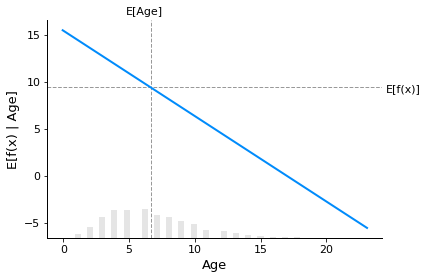

In [162]:
import shap
shap.plots.partial_dependence("Age", new_model.predict,xtrain, ice=False, model_expected_value=True, 
                              feature_expected_value=True)


In [163]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(xtrain, max_samples=2000)
background

In [164]:
#help(shap.maskers.Independent)

In [165]:
xtrain.shape

(4514, 14)

In [166]:
explainer = shap.Explainer(new_model, background)
explainer

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [167]:
shap_values = explainer(xtrain)

In [168]:
shap_values

.values =
array([[  3.17362207,   4.88835646,  -0.09914243, ...,  -0.77453584,
          0.08823779,  -0.01571188],
       [ -1.38029108,  -3.71696485,  -0.09914243, ...,  -0.77453584,
          0.08823779,  -0.01571188],
       [ -1.38029108,  -5.53677871,  -0.09914243, ...,  -0.77453584,
          0.08823779,  -0.01571188],
       ...,
       [-10.48811738,  -3.26553816,  -0.09914243, ...,  -0.77453584,
          0.08823779,  -0.01571188],
       [  1.35205681,   9.99512091,  -0.09914243, ...,   1.89627741,
          0.08823779,  -0.01571188],
       [ -0.46950845,   8.63096588,  -0.09914243, ...,   1.89627741,
          0.08823779,  -0.01571188]])

.base_values =
array([9.61359188, 9.61359188, 9.61359188, ..., 9.61359188, 9.61359188,
       9.61359188])

.data =
array([[  3.  , 147.8 ,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [  8.  ,  86.8 ,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [  8.  ,  73.9 ,   0.  , ...,   1.  ,   0.  ,   0.  ],
       ...,
       [ 18.  ,  90.  ,   

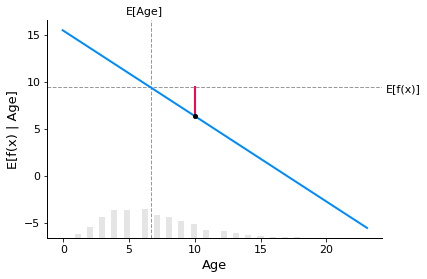

In [169]:
# make a standard partial dependence plot
sample_ind = 23
fig,ax = shap.partial_dependence_plot(
    "Age", new_model.predict, xtrain, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

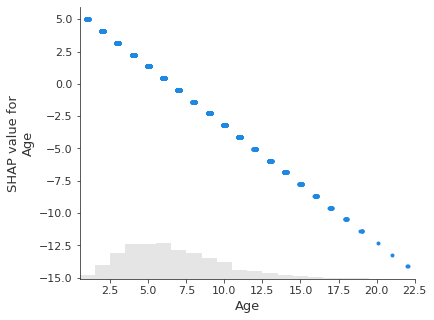

In [170]:
shap.plots.scatter(shap_values[:,"Age"])

In [171]:
xtrain[60:61]

,Age,powerBhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Mumbai,FuelType_Electric,FuelType_Petrol,Transmission_Manual,OwnerType_Second,OwnerType_Third
2966,5,74.0,0,0,0,0,0,0,0,0,0,1,0,0


In [172]:
new_model.predict(xtrain[60:61])

array([4.76566129])

In [173]:
ytrain[60:61]

2966    4.85
Name: Price, dtype: float64

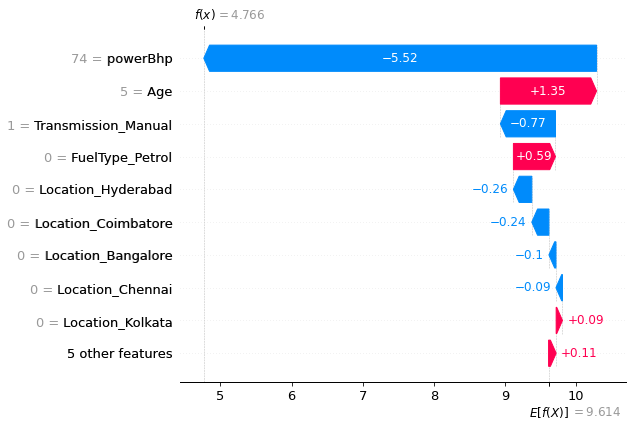

In [174]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[60])


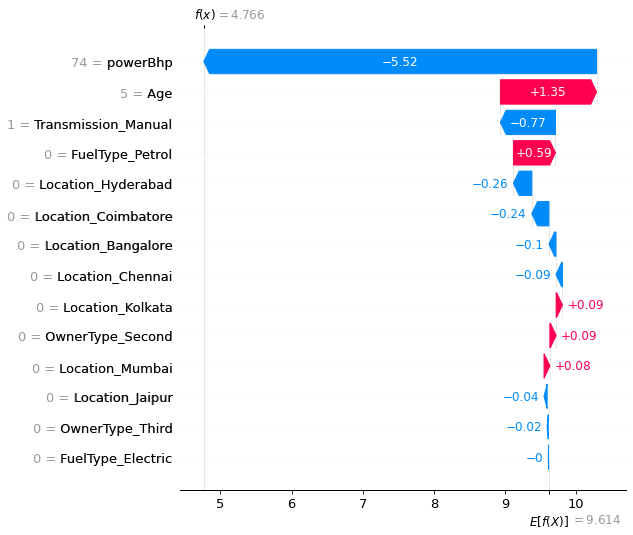

In [175]:
shap.plots.waterfall(shap_values[60],max_display=30)


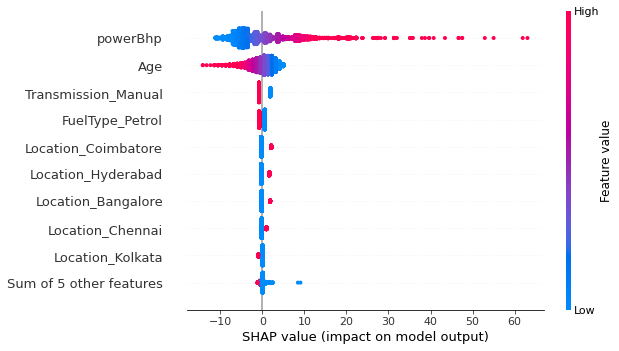

In [176]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)


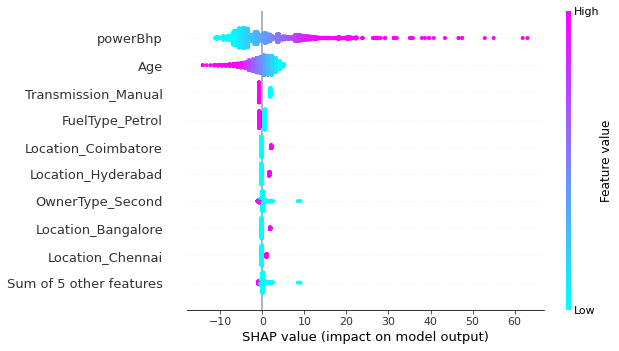

In [177]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

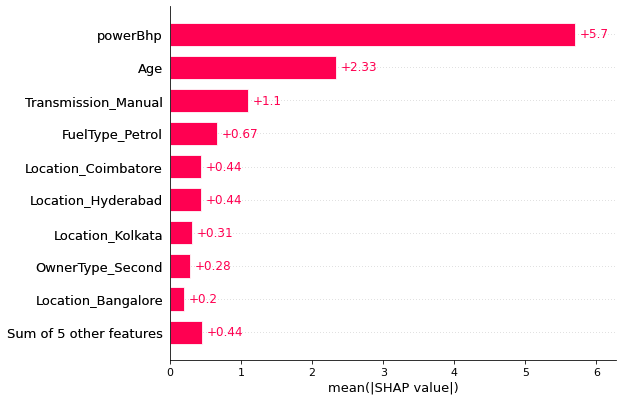

In [178]:
shap.plots.bar(shap_values)

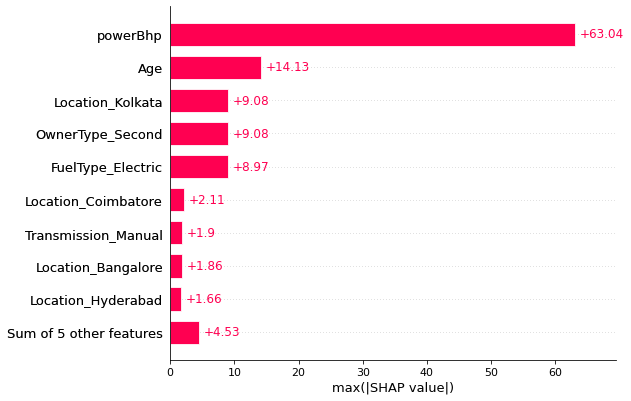

In [179]:
shap.plots.bar(shap_values.abs.max(0))

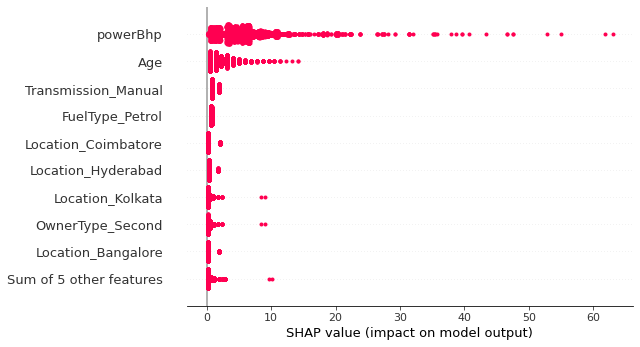

In [180]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

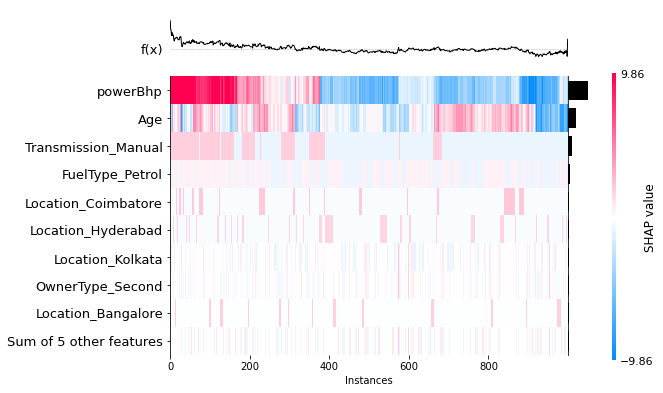

In [181]:
shap.plots.heatmap(shap_values[:1000])

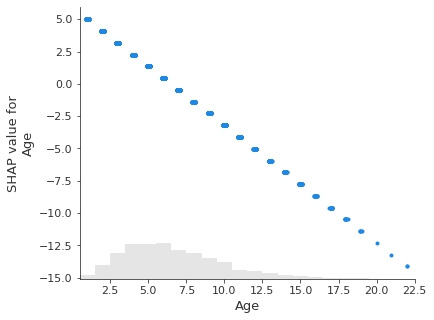

In [182]:
shap.plots.scatter(shap_values[:,"Age"])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


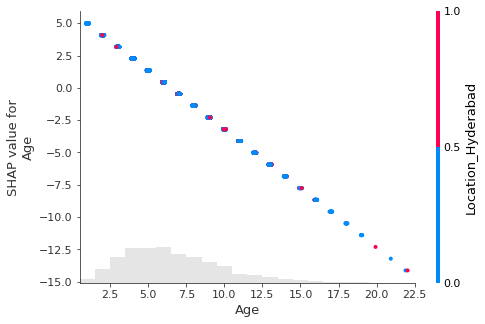

In [183]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)